<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2024/blob/main/Dimensionality_Reduction_Techniques_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding

In [19]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Plot helper function for 2D plots
def plot_2D(X, y, title):
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    # Fix: Use scatter.legend_elements() directly with num argument
    plt.legend(*scatter.legend_elements(num=len(iris.target_names)),
               labels=iris.target_names,
               title="Species")  # Adding a title for better clarity
    plt.grid()
    plt.show()

In [21]:
# PCA (Principal Component Analysis)
def run_pca(X, y):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plot_2D(X_pca, y, 'PCA - 2 Components')

In [22]:
# MDS (Multidimensional Scaling)
def run_mds(X, y):
    mds = MDS(n_components=2, random_state=42)
    X_mds = mds.fit_transform(X)
    plot_2D(X_mds, y, 'MDS - 2 Components')

In [23]:
# LLE (Locally Linear Embedding)
def run_lle(X, y):
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=2, random_state=42)
    X_lle = lle.fit_transform(X)
    plot_2D(X_lle, y, 'LLE - 2 Components')

<ipython-input-20-5263a02710b6>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(*scatter.legend_elements(num=len(iris.target_names)),


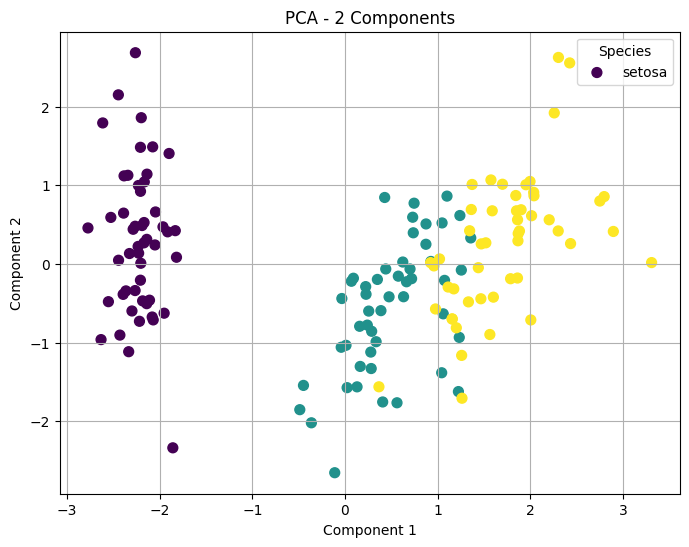

<ipython-input-20-5263a02710b6>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(*scatter.legend_elements(num=len(iris.target_names)),


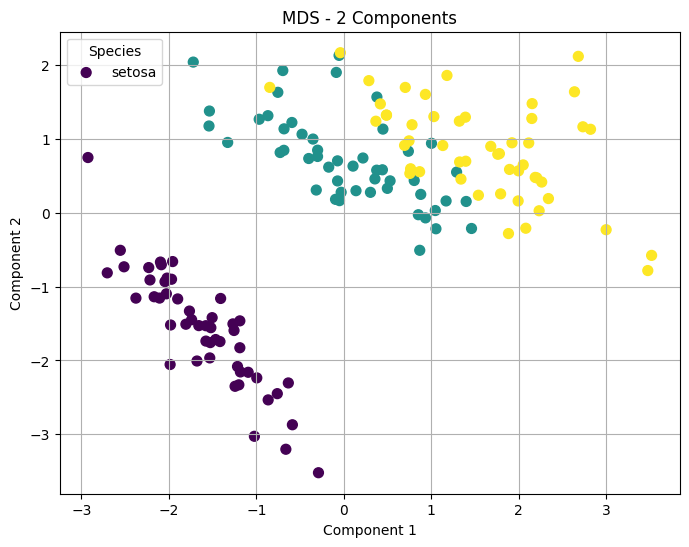

<ipython-input-20-5263a02710b6>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(*scatter.legend_elements(num=len(iris.target_names)),


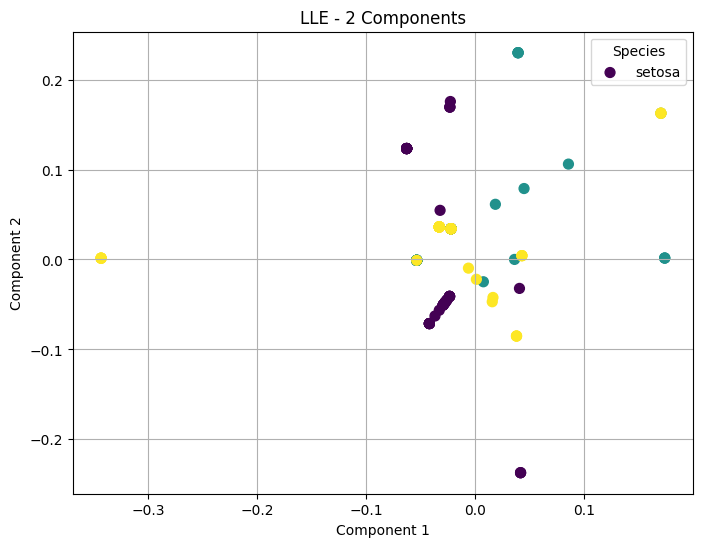

In [24]:
# Run and visualize the dimensionality reduction techniques
run_pca(X_scaled, y)
run_mds(X_scaled, y)
run_lle(X_scaled, y)

Write code to calculate and plot the cumulative explained variance for each principal component using PCA. How many principal components are required to explain 95% of the variance in the Iris dataset?

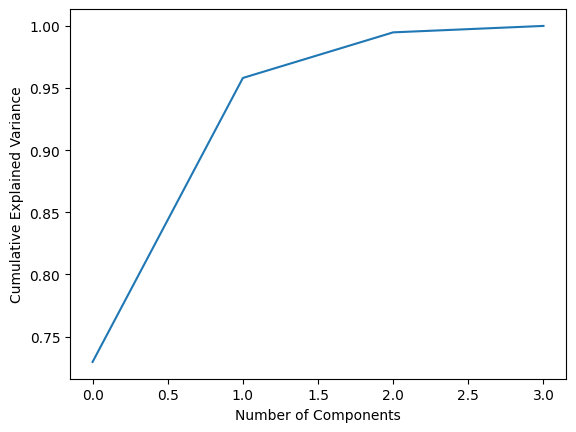

In [25]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Modify the PCA implementation to reduce the data to 3 dimensions and create a 3D scatter plot. Does using 3 components reveal more structure in the data compared to the 2D PCA plot?

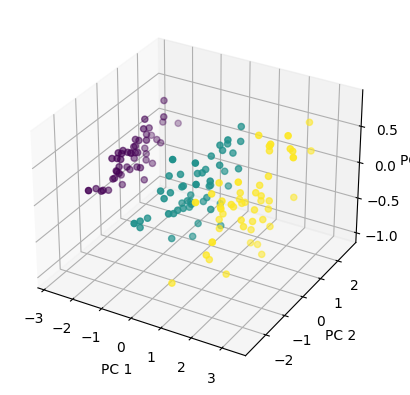

In [26]:
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

Write code to compare the pairwise Euclidean distances in the original high-dimensional space to the distances in the MDS-reduced 2D space. Are distances between points well-preserved after MDS?

In [27]:
# Perform MDS to get the 2D reduced dataset
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# Now calculate pairwise distances
dist_original = pairwise_distances(X_scaled)
dist_mds = pairwise_distances(X_mds)

# Compare correlation between original and MDS-reduced distances
correlation = np.corrcoef(dist_original.flatten(), dist_mds.flatten())[0, 1]
print(f"Correlation between original and MDS-reduced distances: {correlation}")

Correlation between original and MDS-reduced distances: 0.9956024949407966


Modify the LLE algorithm to use different values for n_neighbors (e.g., 5, 10, 20) and visualize the embeddings. How does the choice of n_neighbors affect the embedding?

<ipython-input-20-5263a02710b6>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(*scatter.legend_elements(num=len(iris.target_names)),


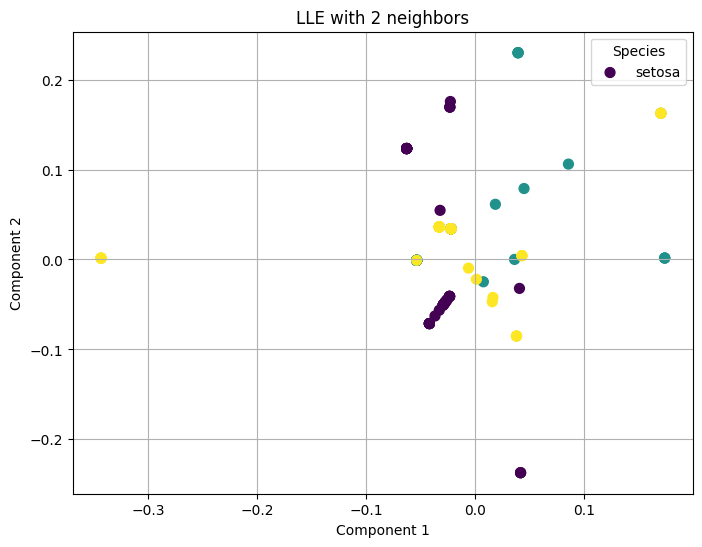

<ipython-input-20-5263a02710b6>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(*scatter.legend_elements(num=len(iris.target_names)),


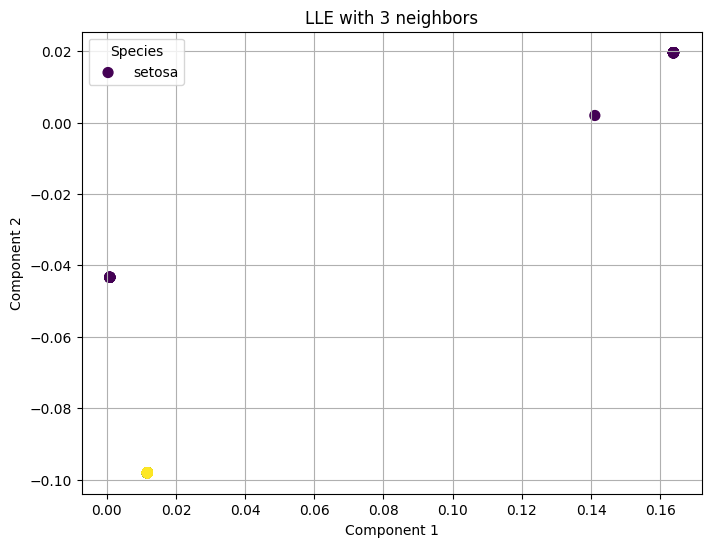

<ipython-input-20-5263a02710b6>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(*scatter.legend_elements(num=len(iris.target_names)),


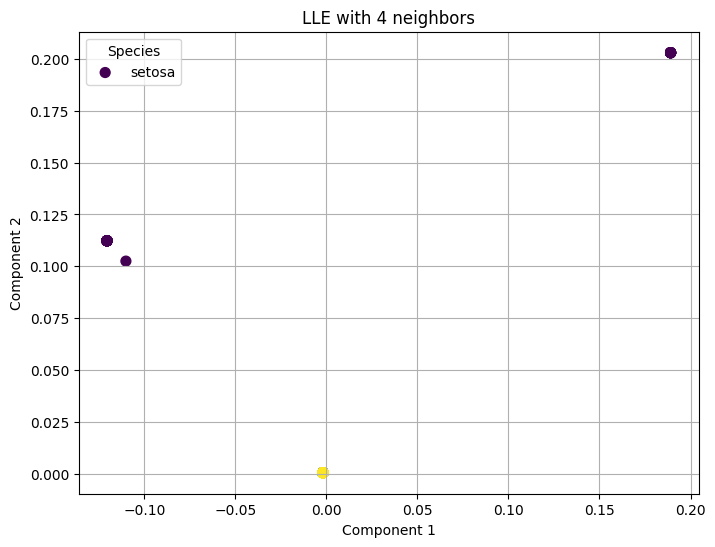

<ipython-input-20-5263a02710b6>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(*scatter.legend_elements(num=len(iris.target_names)),


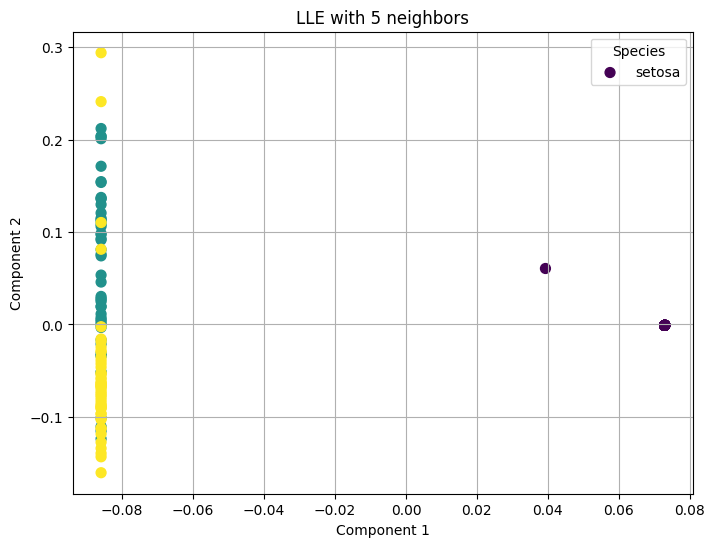

<ipython-input-20-5263a02710b6>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(*scatter.legend_elements(num=len(iris.target_names)),


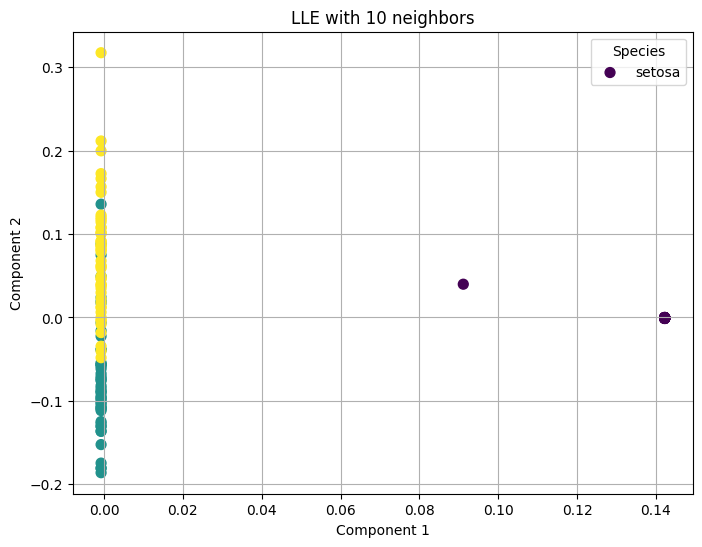

<ipython-input-20-5263a02710b6>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(*scatter.legend_elements(num=len(iris.target_names)),


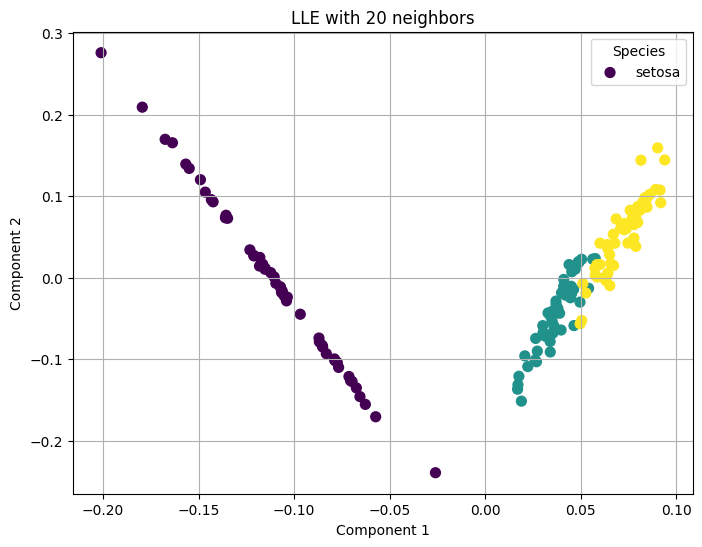

In [28]:
for n_neighbors in [2, 3, 4, 5, 10, 20]:
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors, random_state=42)
    X_lle = lle.fit_transform(X_scaled)
    plot_2D(X_lle, y, f'LLE with {n_neighbors} neighbors')

 Write code to compute the reconstruction error for LLE with different values of n_neighbors. Which value of n_neighbors yields the lowest reconstruction error?

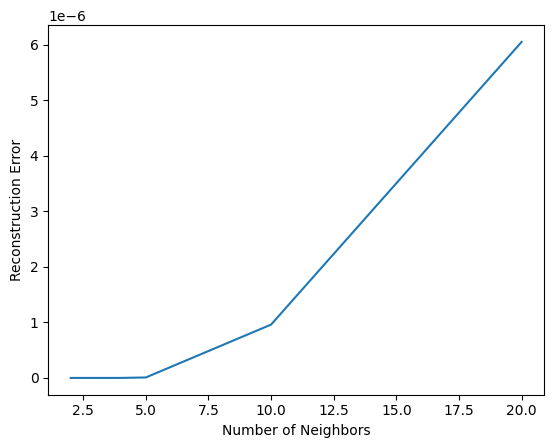

In [29]:
errors = []
for n_neighbors in [2, 3, 4, 5, 10, 20]:
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors, random_state=42)
    X_lle = lle.fit_transform(X_scaled)
    errors.append(lle.reconstruction_error_)

plt.plot([2, 3, 4, 5, 10, 20], errors)
plt.xlabel('Number of Neighbors')
plt.ylabel('Reconstruction Error')
plt.show()